In [1]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

MAX_ITERATION = 10000

In [2]:
def data_generator(mean1, cov1, mean2, cov2, num):
    np.random.seed(0)
    X = np.random.multivariate_normal(mean1, cov1, num//2)
    np.random.seed(1)
    y = np.full(num//2, -1, dtype=int)
    X_ = np.random.multivariate_normal(mean2, cov2, num-num//2)
    y_ = np.full(num-num//2, 1, dtype=int)
    X1 = np.concatenate((X, X_), axis=0)
    y1 = np.concatenate((y, y_))

    return shuffle(X1, y1)


def drawer(X, y, w1, w2):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    for i in range(len(y)):
        if y[i] == 1:
            ax[0].scatter(X[i, 0], X[i, 1], c='r', marker='o')
        else:
            ax[0].scatter(X[i, 0], X[i, 1], c='b', marker='x')

    l_x = np.linspace(np.min(X), np.max(X), X.shape[0])
    l_y = -(w1[0]/w1[2]+w1[1]/w1[2]*l_x)
    ax[0].plot(l_x, l_y)
    xy_max = np.max(X, axis=0)
    ax[0].set(xlim=(-xy_max[0]-1, xy_max[0]+1), ylim=(-xy_max[1]-1, xy_max[1]+1),
              xlabel="x",
              ylabel="y",
              title="Perceptron Learning Algorithm")

    for i in range(len(y)):
        if y[i] == 1:
            ax[1].scatter(X[i, 0], X[i, 1], c='r', marker='o')
        else:
            ax[1].scatter(X[i, 0], X[i, 1], c='b', marker='x')

    l_x = np.linspace(np.min(X), np.max(X), X.shape[0])
    l_y = -(w2[0]/w2[2]+w2[1]/w2[2]*l_x)
    ax[1].plot(l_x, l_y)
    xy_max = np.max(X, axis=0)
    ax[1].set(xlim=(-xy_max[0]-1, xy_max[0]+1), ylim=(-xy_max[1]-1, xy_max[1]+1),
              xlabel="x",
              ylabel="y",
              title="Pocket Algorithm")


def perce_v1(X, y, w_init, max_iter):
    w = w_init
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    for i in range(max_iter):
        h = np.sign(np.dot(X, w))
        mistake_indices = np.where(h != y)[0]
        mistake_num = len(mistake_indices)
        if mistake_num > 0:
            np.random.shuffle(mistake_indices)
            j = np.random.choice(mistake_indices)
            w = w + y[j]*X[j, :]
        else:
            break
    h = np.sign(np.dot(X, w))
    mistake_indices = np.where(h != y)[0]
    mistake_num = len(mistake_indices)
    print('Initial weight vector of Perceptron Learning Algorithm is', w_init)
    print('Final weight vector of Perceptron Learning Algorithm is', w)
    print('Accuracy of Perceptron Learning Algorithm is %.2f%%' %
          (100*(X.shape[0]-mistake_num)/X.shape[0]))
    return w


def perce_v2(X, y, w_init, max_iter):
    w = w_init
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    for i in range(max_iter):
        h = np.sign(np.dot(X, w))
        mistake_indices = np.where(h != y)[0]
        mistake_num = len(mistake_indices)
        if mistake_num > 0:
            np.random.shuffle(mistake_indices)
            j = np.random.choice(mistake_indices)
            w_ = w + y[j]*X[j, :]
            h_ = np.sign(np.dot(X, w_))
            mistake_indices_ = np.where(h_ != y)[0]
            mistake_num_ = len(mistake_indices_)
            if mistake_num_ <= mistake_num:
                w = w_
        else:
            break
    h = np.sign(np.dot(X, w))
    mistake_indices = np.where(h != y)[0]
    mistake_num = len(mistake_indices)
    print('Initial weight vector of Pocket Algorithm is', w_init)
    print('Final weight vector of Pocket Algorithm is', w)
    print('Accuracy of Pocket Algorithm is %.2f%%' %
          (100*(X.shape[0]-mistake_num)/X.shape[0]))
    return w

Initial weight vector of Perceptron Learning Algorithm is [-1.43026011 -1.92269115  0.69713978]
Final weight vector of Perceptron Learning Algorithm is [-0.43026011  3.12097784  0.47082553]
Accuracy of Perceptron Learning Algorithm is 100.00%
Initial weight vector of Pocket Algorithm is [-1.43026011 -1.92269115  0.69713978]
Final weight vector of Pocket Algorithm is [-2.43026011  3.84722492  0.15789058]
Accuracy of Pocket Algorithm is 100.00%


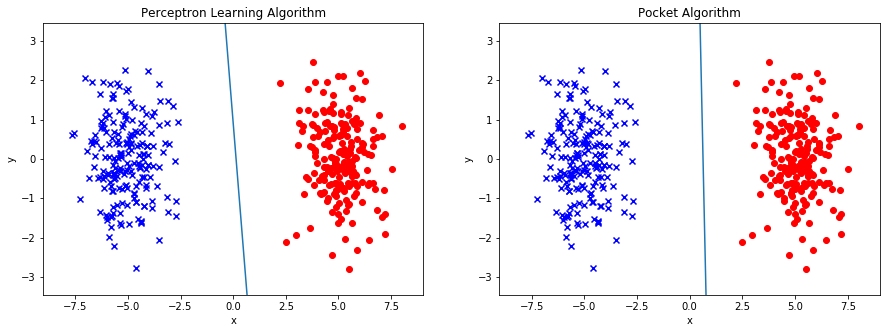

In [3]:
X1, y1 = data_generator([-5, 0], np.identity(2), [5, 0], np.identity(2), 400)
np.random.seed()
w_init = np.random.randn(3)

w1 = perce_v1(X1, y1, w_init, MAX_ITERATION)
w2 = perce_v2(X1, y1, w_init, MAX_ITERATION)
drawer(X1, y1, w1, w2)

Initial weight vector of Perceptron Learning Algorithm is [ 0.34873121 -0.48641155  1.1223297 ]
Final weight vector of Perceptron Learning Algorithm is [0.34873121 3.51903438 0.45074871]
Accuracy of Perceptron Learning Algorithm is 97.25%
Initial weight vector of Pocket Algorithm is [ 0.34873121 -0.48641155  1.1223297 ]
Final weight vector of Pocket Algorithm is [-0.65126879  1.99638631 -0.05015561]
Accuracy of Pocket Algorithm is 97.50%


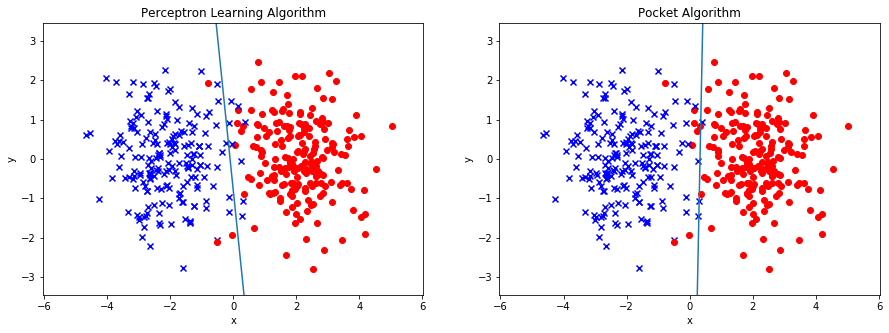

In [4]:
X1, y1 = data_generator([-2, 0], np.identity(2), [2, 0], np.identity(2), 400)
np.random.seed()
w_init = np.random.randn(3)

w1 = perce_v1(X1, y1, w_init, MAX_ITERATION)
w2 = perce_v2(X1, y1, w_init, MAX_ITERATION)
drawer(X1, y1, w1, w2)

Initial weight vector of Perceptron Learning Algorithm is [-0.35135064 -1.09544497  0.37965117]
Final weight vector of Perceptron Learning Algorithm is [-0.35135064  0.47434718  1.00382417]
Accuracy of Perceptron Learning Algorithm is 68.00%
Initial weight vector of Pocket Algorithm is [-0.35135064 -1.09544497  0.37965117]
Final weight vector of Pocket Algorithm is [-0.35135064  3.38265252  0.64649513]
Accuracy of Pocket Algorithm is 87.25%


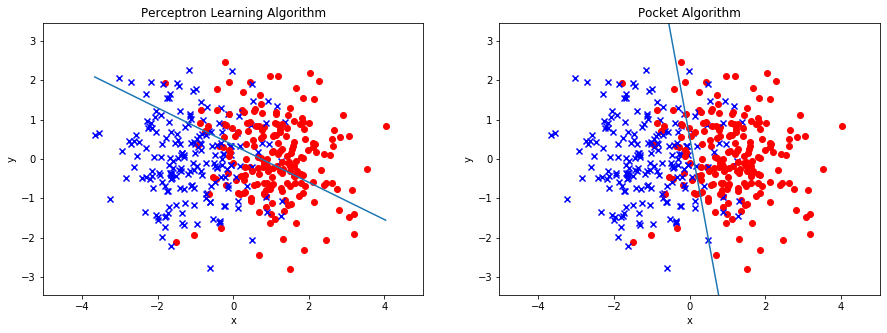

In [5]:
X1, y1 = data_generator([-1, 0], np.identity(2), [1, 0], np.identity(2), 400)
np.random.seed()
w_init = np.random.randn(3)

w1 = perce_v1(X1, y1, w_init, MAX_ITERATION)
w2 = perce_v2(X1, y1, w_init, MAX_ITERATION)
drawer(X1, y1, w1, w2)